# Importing the Libraries

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Showing Directories with List

In [82]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/ecom_neural/ecom_dataset/"
print(os.listdir(DATASET_PATH))

#data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/skin_cancer_cnn/skin_cancer_dataset/skincancer_infection.csv',encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['images', 'styles']


# What is inside the image directory
## Observing some sample image

['images', 'styles', 'images.csv', 'styles.csv']
10001.jpg
10003.jpg
10004.jpg
10005.jpg
10007.jpg
10018.jpg
10029.jpg
10060.jpg
10050.jpg
10070.jpg


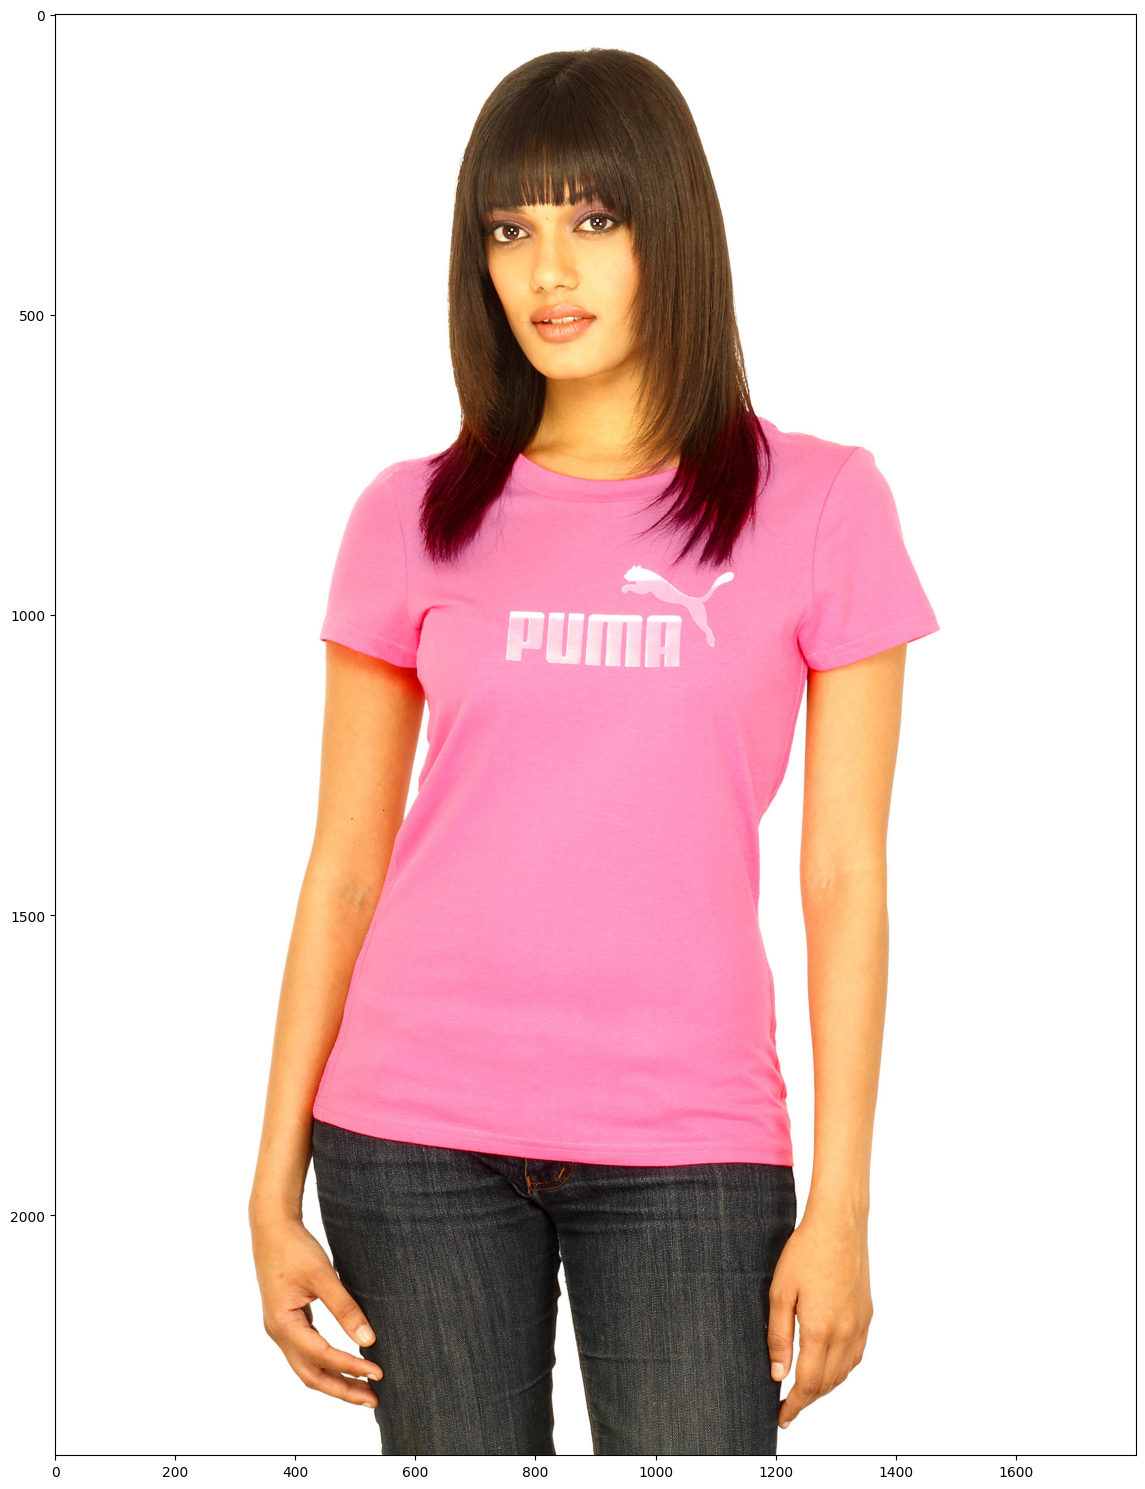

In [83]:
# what is inside the main directory
list_directory = os.listdir(DATASET_PATH)
print(list_directory)

# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break

# what is in the image directory
imageIndex = os.listdir(DATASET_PATH+list_directory[index])
# print(type(imageIndex))
head = 10

# collecting some samples in list
sampleImages = []

# showing indices
for i in range (head):
    sampleImages.append(imageIndex[i])
    print(sampleImages[i])

# choosing some samples to observe
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
row = len(sampleImages)/2
col = row+1

for i in range (len(sampleImages)):
    Image_path=DATASET_PATH+list_directory[index]+"/"+sampleImages[i]
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    axis.append(fig.add_subplot(row, col, i+1))
    subplot_title=sampleImages[i]
    axis[-1].set_title(subplot_title)
    plt.imshow(image)

fig.tight_layout()
plt.show()

# Problem1-We have no labeled data. Exploring styles.csv for more info.

In [84]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ecom_neural/ecom_dataset/styles.csv',encoding='ISO-8859-1',nrows=10)
#df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=44000, error_bad_lines=False)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,10001,Women,Apparel,Bottomwear,Skirts,Blue,Summer,2011,Casual,Palm Tree Kids Girls Sp Jema Skt Blue Skirts
1,10003,Women,Apparel,Topwear,Tshirts,White,Fall,2011,Sports,Nike Women As Nike Eleme White T-Shirt
2,10004,Men,Apparel,Bottomwear,Shorts,Grey,Fall,2011,Sports,Nike Men As 7 Sw Temp Grey Shorts
3,10005,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011,Sports,Nike Men As Ss Trainin Blue T-Shirts
4,10007,Women,Apparel,Topwear,Tshirts,White,Fall,2011,Sports,Nike Women As Trophy Swo White T-Shirts
5,10018,Men,Apparel,Bottomwear,Shorts,Black,Fall,2012,Sports,Nike Men Black Three Quarter Track Pants
6,10029,Women,Apparel,Topwear,Sweatshirts,Navy Blue,Fall,2011,Sports,Nike Women As Script Mas Navy Blue Sweatshirts
7,10050,Men,Apparel,Topwear,Tshirts,Black,Fall,2011,Casual,Puma Men Usain Bolt Black Tshirts
8,10060,Men,Apparel,Topwear,Tshirts,White,Fall,2011,Casual,Puma Men motor sport tee White Tshirts
9,10070,Women,Apparel,Topwear,Tshirts,Pink,Fall,2011,Casual,Puma Women Large logo tee Pink Tshirts


# Image id matches with styles.csv file Id column.
## For ease of access, adding another column naming 'id.jpg'

In [85]:
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,10001,Women,Apparel,Bottomwear,Skirts,Blue,Summer,2011,Casual,Palm Tree Kids Girls Sp Jema Skt Blue Skirts,10001.jpg
1,10003,Women,Apparel,Topwear,Tshirts,White,Fall,2011,Sports,Nike Women As Nike Eleme White T-Shirt,10003.jpg
2,10004,Men,Apparel,Bottomwear,Shorts,Grey,Fall,2011,Sports,Nike Men As 7 Sw Temp Grey Shorts,10004.jpg
3,10005,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011,Sports,Nike Men As Ss Trainin Blue T-Shirts,10005.jpg
4,10007,Women,Apparel,Topwear,Tshirts,White,Fall,2011,Sports,Nike Women As Trophy Swo White T-Shirts,10007.jpg
5,10018,Men,Apparel,Bottomwear,Shorts,Black,Fall,2012,Sports,Nike Men Black Three Quarter Track Pants,10018.jpg
6,10029,Women,Apparel,Topwear,Sweatshirts,Navy Blue,Fall,2011,Sports,Nike Women As Script Mas Navy Blue Sweatshirts,10029.jpg
7,10050,Men,Apparel,Topwear,Tshirts,Black,Fall,2011,Casual,Puma Men Usain Bolt Black Tshirts,10050.jpg
8,10060,Men,Apparel,Topwear,Tshirts,White,Fall,2011,Casual,Puma Men motor sport tee White Tshirts,10060.jpg
9,10070,Women,Apparel,Topwear,Tshirts,Pink,Fall,2011,Casual,Puma Women Large logo tee Pink Tshirts,10070.jpg


# Building another dataframe with columns- image and article type

In [86]:
augmentedDataframe = pd.DataFrame({
    'filename': df['image'],
    'type': df['articleType']
})

# total number of entries in the dataframe
total_row = len(augmentedDataframe)
print('total row count: ', total_row)

augmentedDataframe.head(10)

total row count:  10


,filename,type
0,10001.jpg,Skirts
1,10003.jpg,Tshirts
2,10004.jpg,Shorts
3,10005.jpg,Tshirts
4,10007.jpg,Tshirts
5,10018.jpg,Shorts
6,10029.jpg,Sweatshirts
7,10050.jpg,Tshirts
8,10060.jpg,Tshirts
9,10070.jpg,Tshirts


> # Created a list with unique values And added a column with their specified element position

In [87]:
unique_types = augmentedDataframe['type'].unique().tolist()
total_class = len(unique_types)
print(total_class)
print(unique_types)
print(unique_types[0])
print(unique_types.index(unique_types[0]))
augmentedDataframe['number_types'] = augmentedDataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)
augmentedDataframe.head(10)

4
['Skirts', 'Tshirts', 'Shorts', 'Sweatshirts']
Skirts
0


,filename,type,number_types
0,10001.jpg,Skirts,0
1,10003.jpg,Tshirts,1
2,10004.jpg,Shorts,2
3,10005.jpg,Tshirts,1
4,10007.jpg,Tshirts,1
5,10018.jpg,Shorts,2
6,10029.jpg,Sweatshirts,3
7,10050.jpg,Tshirts,1
8,10060.jpg,Tshirts,1
9,10070.jpg,Tshirts,1


In [88]:
augmentedDataframe['type'].value_counts()

type
Tshirts        6
Shorts         2
Skirts         1
Sweatshirts    1
Name: count, dtype: int64

# Here total counting length is 108. Total number of type classes available 108.

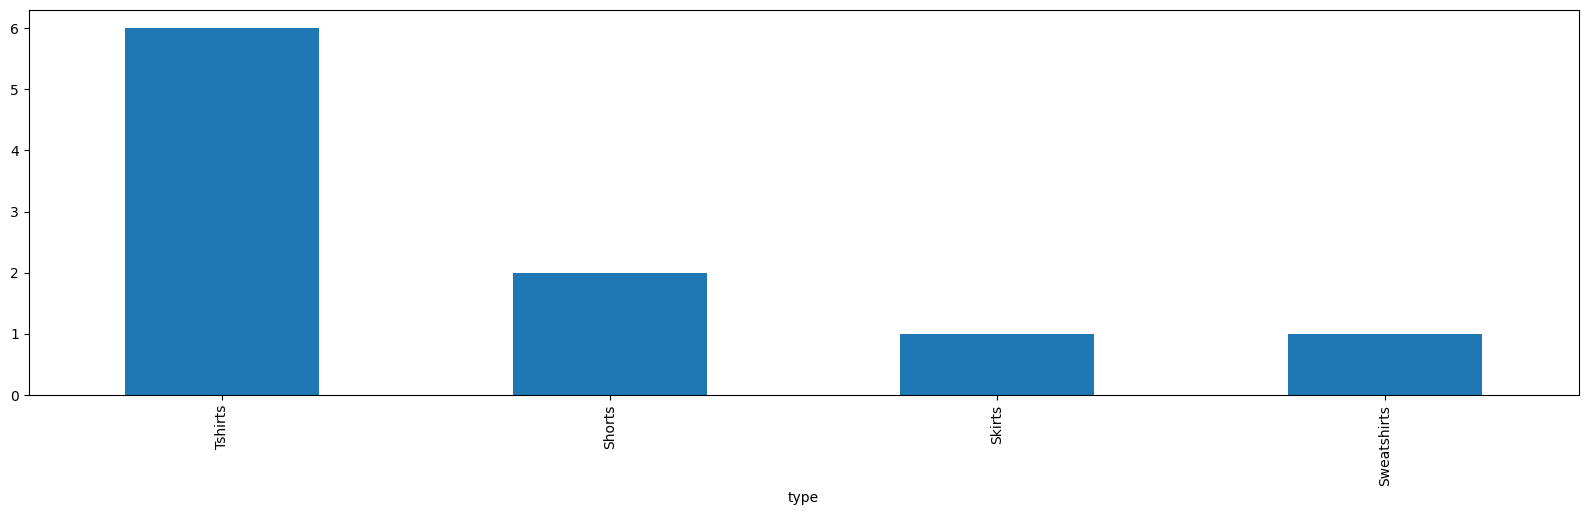

In [89]:
plt.figure(figsize=(20,5))
augmentedDataframe['type'].value_counts().plot(kind='bar',x='type',y='filename')
plt.show()

# Starting with train and test data
## Inserting Image and Labels in numpy array

# Utility Function to get images and inserted into image array
## Start and Stop parameters will be useful train and test separation

## Here all X=image_data, Y=label_data

In [90]:
def getData(start,stop):
    x_data = []
    y_data = []
    #start = 0 #setting start parameter
    #stop = int(0.001*total_row) #setting stop parameter

    for i in range(start, stop):
        Image_path=DATASET_PATH+list_directory[index]+"/"+augmentedDataframe.loc[i,'filename']
#         print(augmentedDataframe.loc[i,'filename'])
        image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
        try:
            resized_img = cv2.resize(image, dsize=(28, 28))
        except:
            print("Rejected Image: "+augmentedDataframe.loc[i,'filename'])
            continue
        x_data.append(resized_img)
        y_values = augmentedDataframe.loc[i,'number_types'] # earlier it was type
        y_data.append(y_values)

    return x_data, y_data

# Test of the function

In [91]:
X=[]
Y=[]
# for now start=0,stop=(0.001*total_row)
# total_row=count of rows in augmented data frame
start = 0
stop = int(0.001*total_row) # testing with 0.1% image of the dataset
X,Y=getData(start,9)
print(X)

[array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [2

<class 'list'>
[array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 

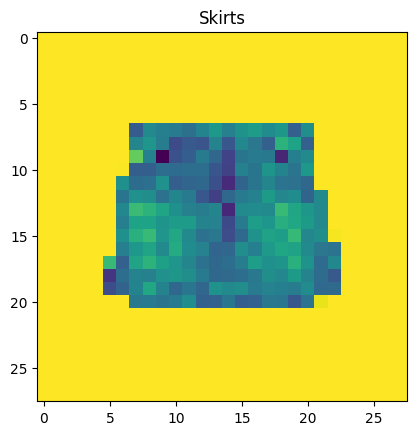

In [92]:
print(type(X))
print(X)
plt.title(unique_types[Y[0]])
plt.imshow(X[0])

## Successful insertion of images in the array. Also we got the labels required.

# Change into numpy array

In [93]:
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)
print(Y.shape)


(9,)


# Normalizing by 255

In [94]:
X = X/255.0

print(Y.shape)

(9,)


# Processing labels for dimension matching

In [95]:
Y = Y.reshape(len(X),)

# Sample printing

In [96]:
print(type(X))
print(X.shape)
print(Y.shape)
# print(X[0])
# print(Y[0])

<class 'numpy.ndarray'>
(9, 28, 28, 1)
(9,)


# Adding all the images to numpy array
> # X=Image Array
> # Y=Image Label Array

In [99]:
X=[]
Y=[]
start = 0
stop = total_row
X,Y=getData(start,stop)

# conversion into numpy array
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)

# normalizing
X = X/255

# processing Y_train for dimension matching
Y = Y.reshape(len(X),)

In [100]:
print('Image Data Shape: ',X.shape)
print('Label Data Shape: ',Y.shape)

Image Data Shape:  (10, 28, 28, 1)
Label Data Shape:  (10,)


# Now we got Image and Label added in the arrays. Next will be Spliting both train and test data.

> # Train,Test Division into 90:10
> # Train,Validation Division into 90:10
> Train, Validation, Test Percentage 80:10:10

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 500)

In [103]:
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Test Image Data Shape: ',X_test.shape)
print('Test Label Data Shape: ',Y_test.shape)


Train Image Data Shape:  (9, 28, 28, 1)
Train Label Data Shape:  (9,)
Test Image Data Shape:  (1, 28, 28, 1)
Test Label Data Shape:  (1,)


In [104]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 500)

In [105]:
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Validation Image Data Shape: ',X_validate.shape)
print('Validation Label Data Shape: ',Y_validate.shape)

Train Image Data Shape:  (8, 28, 28, 1)
Train Label Data Shape:  (8,)
Validation Image Data Shape:  (1, 28, 28, 1)
Validation Label Data Shape:  (1,)


> ## Splitting done with train and test and validation set.

# CNN Model Create

># Importing Libraries

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

> # Creating sequential model with three layers

In [107]:
def build_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(units = 512, activation = 'relu'))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Dense(units = total_class, activation = 'softmax'))
    return cnn_model


In [108]:
model=build_model()

In [109]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

In [110]:
def train_model(model):
    model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (X_validate, Y_validate))
#     model.fit(X_train, Y_train, epochs=50, batch_size=512, validation_split=0.2)

In [111]:
train_model(model)

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 1.3885 - accuracy: 0.2500 - val_loss: 1.4256 - val_accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 0s 44ms/step - loss: 1.2726 - accuracy: 0.6250 - val_loss: 1.4963 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 [==============================] - 0s 43ms/step - loss: 1.1810 - accuracy: 0.6250 - val_loss: 1.5873 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 [==============================] - 0s 45ms/step - loss: 1.1149 - accuracy: 0.6250 - val_loss: 1.7217 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 75ms/step - loss: 1.0686 - accuracy: 0.6250 - val_loss: 1.8990 - val_accuracy: 0.0000e+00
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 1.0312 - accuracy: 0.6250 - val_loss: 2.0739 - val_accuracy: 0.0000e+00
Epoch 7/150
1/1 [==============================] - 0s 43ms/step - loss: 1.0851 - accuracy: 0.6250 - val_loss: 2.1478 - val_accuracy: 0.000

# Load Model

In [135]:
 #from keras import models

In [137]:
#model = models.load_model('visual_product_recommend.h5')

# Saving Model

In [138]:
model.save('visual_product_recommend.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Evolution

Text(0.5, 1.0, 'Accuracy evolution')

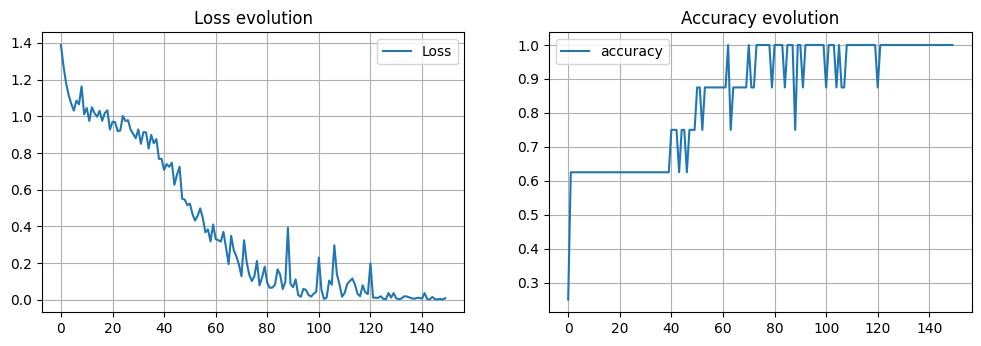

In [139]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['loss'], label='Loss')
# plt.plot(model.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['accuracy'], label='accuracy')
# plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

# Predictions for the test data

In [144]:
predict_x=model.predict(X_test)
predicted_classes=np.argmax(predict_x,axis=1)

#predicted_classes = model.predict_classes(X_test)

1/1 [==============================] - 0s 41ms/step


IndexError: index 1 is out of bounds for axis 0 with size 1

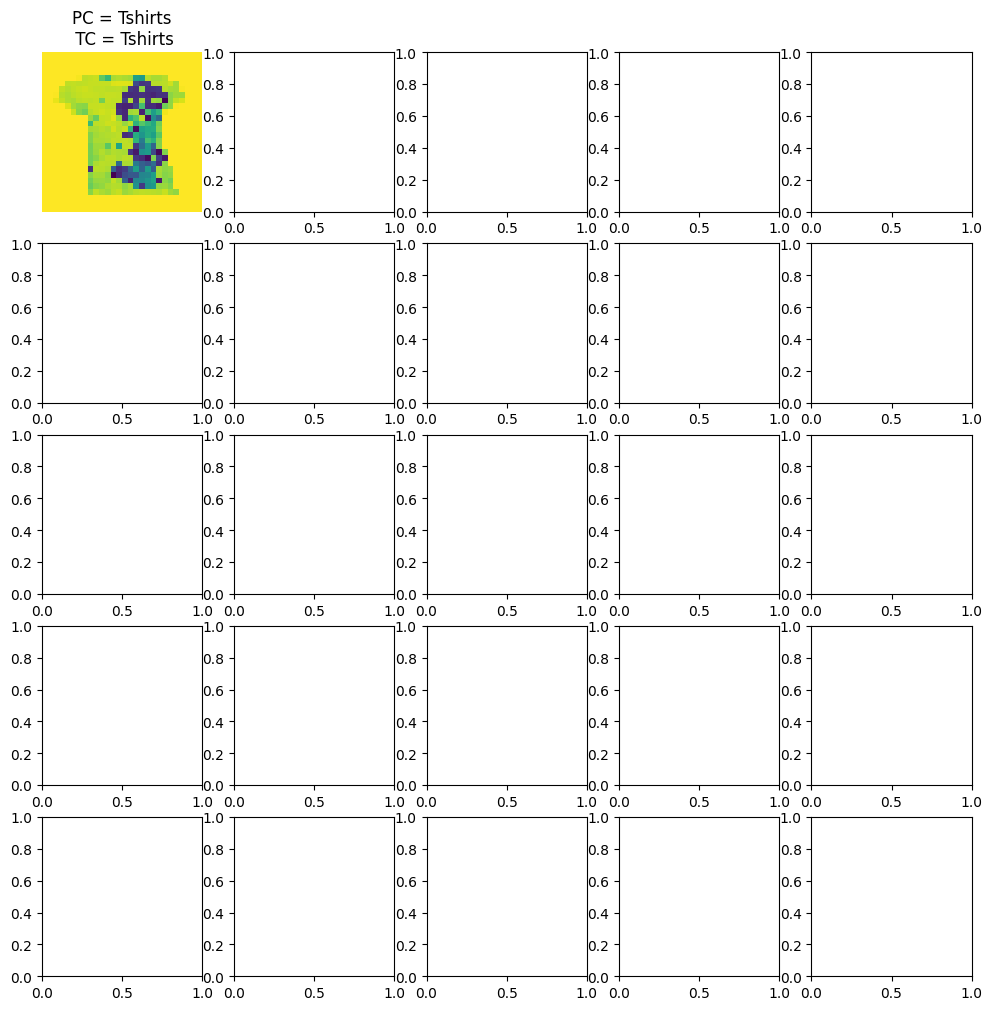

In [147]:
#PC=PredictedClass #TC=TrueClass
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"PC = {unique_types[predicted_classes[i]]}\n TC = {unique_types[Y_test[i]]}") #predicted_classes[i]:0.1f #Y_test[i]:0.1f
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# Single Image Prediction & Find the Label of the Image

In [ ]:
#augmentedDataframe.head(10)

In [148]:
def load_image(i):
    Image_path=DATASET_PATH+list_directory[index]+"/"+augmentedDataframe.loc[i,'filename']
    Image_id=augmentedDataframe.loc[i,'filename'].split(".")
    res=Image_id[0]
    image = cv2.imread(Image_path,cv2.IMREAD_COLOR)
    resized_img = cv2.resize(image, dsize=(224, 224))
    return resized_img,res

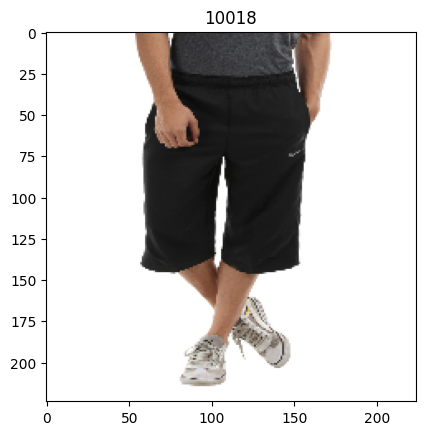

In [152]:
img,img_id = load_image(5)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title(img_id)
plt.imshow(img)

In [153]:
def make_prediction(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img, dsize=(28, 28))
    x_data = np.array(resized_img).reshape(-1, 28,28,1)
    x_data=x_data/255
#     print(x_data)
#     print(x_data.shape)
    result=model.predict(x_data)
#     print(type(result))
#     print(np.argmax(result))
    return x_data,unique_types[np.argmax(result)]


In [154]:
numpy_image,result=make_prediction(img)
print(result)

1/1 [==============================] - 0s 47ms/step
Tshirts


In [ ]:
#df.head(10)

# Starting Check for Similarity

In [155]:
typeList=[]
for i, row in df.iterrows():
    if(row["articleType"]==result):
        #print(row["id"],row["articleType"])
        if(img_id!=str(row["id"])):
            typeList.append(row['id'])

In [125]:
print(typeList)

[]


In [156]:
i=0
X_similar=[]
X_id_similar=[]
X_numpy=[]
for imageId in typeList:
#     print(imageId)
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(imageId)+".jpg"
    image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
    try:
        resized_img = cv2.resize(image, dsize=(28,28))
    except:
        print("can't read file: ", str(imageId)+".jpg")
    X_similar.append(resized_img)
    X_id_similar.append(imageId)

X_numpy = np.array(X_similar).reshape(-1, 28,28,1)
X_numpy = X_numpy/255
#print(X_numpy[0])


Text(0.5, 1.0, '10003')

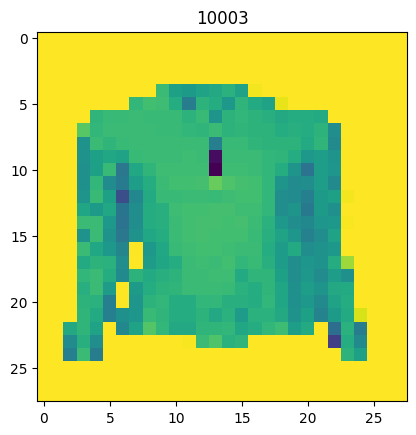

In [157]:
plt.imshow(X_similar[0])
plt.title(X_id_similar[0])

# Calculating Vector Distance between Two Image

In [158]:
import math
def calculateDistance(i1, i2):
    return math.sqrt(np.sum((i1-i2)**2))

In [159]:
print(calculateDistance(numpy_image,X_numpy[0]))

11.09263985610803


In [160]:
distance_list=[]
for i in range (0, len(X_numpy)):
    distance_list.append(calculateDistance(numpy_image,X_numpy[i]))

sorted_distance_list=distance_list.copy()
#print(distance_list)
sorted_distance_list.sort()

least_ten_distance=sorted_distance_list[0:10]
print(least_ten_distance)
index_distance=[]
for i in range (0, len(least_ten_distance)-1):
    if(least_ten_distance[i]!=least_ten_distance[i+1]):
        index_distance.append(distance_list.index(least_ten_distance[i]))

index_distance=index_distance[0:5]

print(index_distance)

[10.642013754332629, 10.770146130576482, 10.85467244458704, 10.928210744707394, 11.09263985610803, 12.417607892613699]
[5, 3, 2, 1, 0]


# Recommended Items

10003
10005
10007
10050
10060


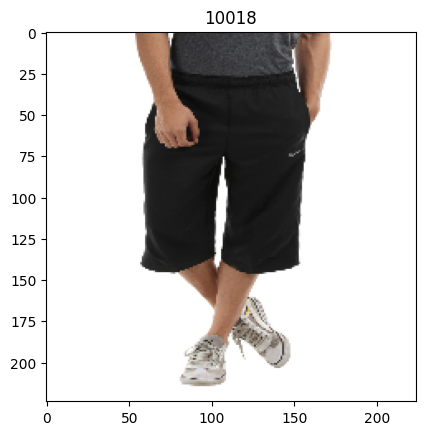

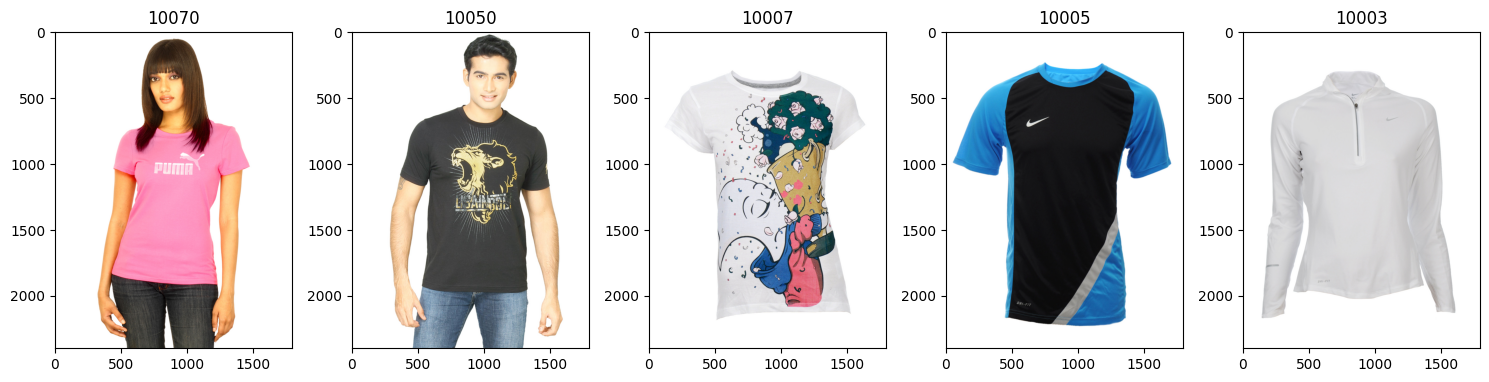

In [ ]:
# Image_path=DATASET_PATH+list_directory[index]+"/"+str(img_id)+".jpg"
# src = cv2.imread(Image_path)
# image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(img_id)

fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
for i in range(0,len(index_distance)):
    print(X_id_similar[i])
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(X_id_similar[index_distance[i]])+".jpg"
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    axis.append(fig.add_subplot(1,5, i+1))
    subplot_title=str(X_id_similar[index_distance[i]])
    axis[-1].set_title(subplot_title)
    plt.imshow(image)

fig.tight_layout()
plt.show()
